In [58]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
az.style.use('arviz-darkgrid')
np.random.seed(44)


In [4]:
import seaborn as sns
sns.set_theme()
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams.update({
    "figure.figsize": [8, 4],
    'figure.facecolor': '#fffff8',
    'axes.facecolor': '#fffff8',
    'figure.constrained_layout.use': True,
    'font.size': 14.0,
    'hist.bins': 'auto',
    'lines.linewidth': 3.0,
    'lines.markeredgewidth': 2.0,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 8.0, 
})
sns.set(rc={'figure.figsize':(8,4)})

# Linear regression


Giorgio Corani <br/>
*Bayesian Data Analysis and Probabilistic Programming*
<br/>
<br/>
``giorgio.corani@supsi.ch``





# Outline
* Traditional linear regression
* Probabilistic linear regression
* Robust linear regression

# Based on.. 


*   Chapter 3 of O. Martin, *Bayesian Analysis with Python, Second Edition*.
* Chapter 8 of *the Bayes rule book* https://www.bayesrulesbook.com/chapter-10.html

* The discussion of traditional linear regression is based on Sec 5.1 ( <a href="https://otexts.com/fpp2/regression-intro.html">https://otexts.com/fpp2/regression-intro.html</a>) of the online book <a href="https://otexts.com/fpp2/"> Forecasting: Principles and Practice </a> by Rob J Hyndman and George Athanasopoulos

*  Notebook by G. Corani

# Linear regression

* We want to predict the value of $Y$ given the observation of $X$.


* $X$ and $Y$ are random variables:
    *  $Y$ is the *dependent* (or  *response*) variable
    *  $Y$  is the *independent*  variable   (or *explanatory variable*   or *covariate*)


* Random variables are denoted by uppercase variables, observations are denoted by lowercase variables.


* We have paired observations $\{(x_1,y_1), (x_2,y_2), (x_3,y_3),\dots (x_n,y_n)\}$. 



# Simple linear regression

$$Y = \alpha +  \beta X  + \epsilon$$


* $\beta$ (*slope*): average predicted change in $Y$  for a unit change in  $X$. 


* $\alpha$ (*intercept*):  predicted value of $Y$ for $X$ = 0.  However $X$=0 could be far from the observed data, in which case we  think of $\alpha$ as a constant which calibrates the shift along the y-axis.


* simple linear regression is based on a single explanatory variable.


* $\epsilon$ is a noise affecting the  observations, which do not lie on the straight line but are scattered around it. 

# Simple linear regression

<img src='img/linreg.png' width=400 align="center" > 

If we consider the i-th instance, we have:


$$y_i = \alpha + x_i \beta  + \epsilon_i$$

* $y_i$ and $x_i$ denote the observation of $x$ and $y$ in the $i$-th instance (an instance is a row of data).


*   The noise term $\epsilon_i$ implies a deviation from the  linear model. It captures anything that may affect $y_i$ other than $x_i$.

# Assumptions about  $\epsilon$

We assume the noise $\epsilon$ :

*  to have mean zero; otherwise the prediction will be systematically biased;
*  to be  normally distributed with  variance $\sigma^2_{\epsilon}$;
*   to be independent from the value of $y$.

Thus, we assume $\epsilon_i \sim N(0, \sigma^2_{\epsilon})$.

# The effect of $\sigma_{\epsilon}$


<img src='img/sigma-effect.png' width=400 align="center" > 


* Below the same linear relation is shown with either a small or a large value of  $\sigma_{\epsilon}$.


* The small $\sigma_{\epsilon}$ implies that observations deviates very little from the  model, i.e. from the line.


* The  larger $\sigma_{\epsilon}$  implies larger variability of the observations around the linear model and hence a weaker relationship between these variables. 


* According to the normal assumption, 95% of the observations  lie  in an interval of $\pm 2 \sigma_{\epsilon}$ around the regression line.



# Multiple linear regression

* Linear regression with $k$ explanatory variables:

\begin{align}
 Y = \alpha+ \sum_i β_i X_i +ε,
\end{align}


* The coefficients $\beta_1,…,\beta_k$ measure the effect of each predictor after taking into account the effects of all the other predictors in the model.


* They measure the *marginal effects* of each  explanatory variable.

# Traditional estimation

# Least square estimation for simple regression

* We need to estimate from data the coefficients $\alpha, \beta$.


*  The estimated coefficients are referred to as  $\hat{\alpha}, \hat{\beta}$.


* We do so  by minimising the sum of the squared errors: 

* BELOW TO BE UNCOMMENTED

\begin{align*} 
aa
% \hat{\alpha}, \hat{\beta} & = \arg \min    \sum_{i=1}^{n} e_i^2\\
% & =    \arg \min  \sum_{i=1}^{n} (y_i - \hat{y}_i)^2  =\\
% & =    \arg \min  \sum_{i=1}^{n}   \left(y_i− \hat{\alpha}− \hat{\beta} x_{i}\right)^2.
\end{align*}






# Residuals 

* Define the *residual*  on the i-th instance as:
$$e_i = y_i  - \hat{y}_i$$


* Each $e_i$ is the prediction error, i.e. the difference between the observation and the expected value of $y$.


* Thus $e_i$ is an estimate of the unobservable $\epsilon_i$, in the same way that $\hat{b}$ is an estimate of $\beta$


# Point prediction

* The prediction of $y$ is denoted by $\hat{y}$. It is computed by:
    * using the estimates  $\hat{\alpha}, \hat{\beta_1},…,\hat{\beta_k}$ in  the regression equation 
    * setting the error term to zero, since $E[\epsilon]=0$.

\begin{align}
 \hat{y}_i= \hat{\alpha} + \hat{\beta}_1 x_{1,i} + \hat{\beta}_2 x_{2,i} + ... +\hat{\beta}_k x_{k,i}
 \end{align}
 
* The prediction relies on single estimate (*point estimate*) of the parameters. 

* Relying on point estimates  might lead to overfitting: alternative parameter values might be plausible but they are ignored.

* Solution: account  for parameter uncertainty (see later).


# Linear regression in sklearn

# Generating the data

* We generate the $x_i$'s   randomly.


* We generate  the observations corrupted by  noise as  $y_i = \alpha + \beta x_i + \epsilon$


* We then plot both the  actual model ($y = \alpha + \beta x$) and the observations corrupted by noise.

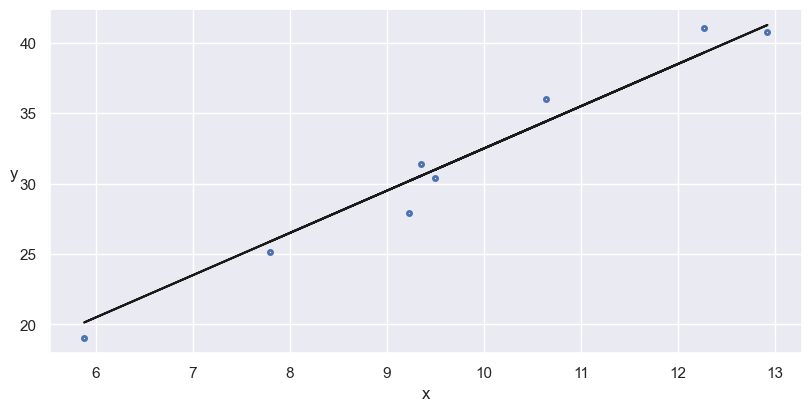

In [5]:
np.random.seed(1)
N = 8

#real parameters have a final '0' in their names.
alpha0  = 2.5
beta0   = 3
sigma_eps = 1


# the x are generared according to N(mean=10, sigma=2)
x        = np.random.normal(10, 2, N)
y        = alpha0 + beta0 * x 
noise = np.random.normal(0, sigma_eps, size=N)
y_obs   = y + noise


fig = plt.figure(figsize=(8, 4))
ax  = plt.axes()

#plot noisy observations
ax.plot(x, y_obs, 'C0.')
ax.set_xlabel('x')
ax.set_ylabel('y', rotation=0) 

#plot the actual model
ax.plot(x, y, 'k'); 

# Fitting linear regression on the data

Estimated intercept: 
 -0.49
Estimation  error: 
 2.99


Estimated beta: 
 [3.29]
Estimation  error: 
 [0.29]


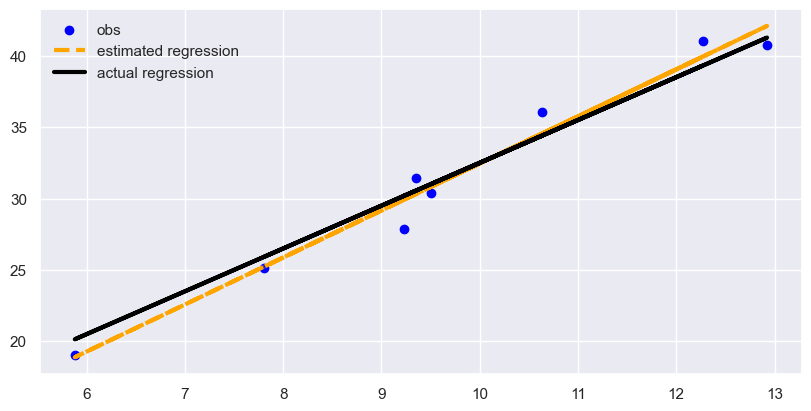

In [6]:
from sklearn import  linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using all observations
#We need to reshape x to feed the model
regr.fit(x.reshape(-1,1), y_obs)
y_pred = regr.predict(x.reshape(-1,1))


# print the coefficients
print("Estimated intercept: \n",  np.round(regr.intercept_,2))
print("Estimation  error: \n",  np.round(np.abs(regr.intercept_ - alpha0),2))
print("\n" )
print("Estimated beta: \n",  np.round(regr.coef_,2))
print("Estimation  error: \n",  np.round(np.abs(regr.coef_ - beta0),2))

plt.figure(figsize=(8, 4))
plt.scatter(x, y_obs, color="blue", label='obs')
plt.plot(x, y_pred, color="orange", linewidth=3, linestyle='dashed', label='estimated regression');
plt.plot(x, y, color="black", linewidth=3, linestyle='solid', label='actual regression')
plt.legend();

# Improving over least squares fitting


* We want predictions which  keep track of the uncertainty in our estimate, which are generally affected by error.
    * Solution:  switch to a probabilistic model


* By switching to the probabilistic approach we can moreover address the following problems:

    * The least square estimate, being based on the squared error, is  sensive to outliers.
        * Solution:  *robust regression*
    

    * What if we have related data sets, i.e., data collected from different hospitals about the same disease?
         * Solution: *hierarchical regression*




# Probabilistic approach to linear regression


Since the noise $\epsilon$ is $N(0, \sigma_{\epsilon})$, we have:

\begin{align}
 Y  &= \alpha + X \beta + N(0,\sigma_{\epsilon}) \\
 & \text{equivalently:}\\
Y &\sim \mathcal{N}(\mu=\alpha + X \beta,  \sigma_{\epsilon}) \\
\end{align}

Once we observe the value $x_i$, our prediction about $y_i$ is:
* mean $\alpha + x_i \beta$ 
* standard deviation: $\sigma_{\epsilon}$.  

A linear regression is a Gaussian model whose mean is a linear function of the covariates.

# Setting independent priors

*  We must specify a prior distribution for each of the three  parameters: $\alpha$, $\beta$, $\sigma_{\epsilon}$.


* We assume the parameters to be  independent.


* Thus we specify independently the prior of each parameters, which greatly simplifies the task. 


* Thus  our prior understanding of where the model “lives” (β0) has nothing to do with our prior understanding of the rate at which $Y$ increases with $X$ and with our prior understanding about  the strength of the relationship,  which is represented by $\sigma_{\epsilon}$ (low $\sigma_{\epsilon}$ imply strong relation, and vice versa).


# Example on how to set priors



## Background information


* A researcher wants to use a person’s age (in years) to predict their annual orange juice consumption (in liter).  The age of the enrolled persons varies between 5 and 50 years.


* Previous studies have shown that the average consumption is around 50 - 60 liters/year for 5-years old and 5-15 liters/year for 50-years old persons.


## Inferred prior for the slope
   
   
*  This suggest an average decrease of the consumption of about 1 liter per year
   
   
*  Yet  the decrease could be as large as (60-5)/45 = 1.2 liter per year or as small as (50-15)/45 = 0.8 liter per year.
    
   
 * We consider the range (0.8, 1.2)  as a 95% interval, which has thus lenght roughly $4\sigma$, hence $\sigma$=0.1
    
    
* Assuming normality, our prior for the slope is $\beta \sim N(-1,  0.1)$
    
    
* This is a reasonable prior based on the above information, but different priors could be equally acceptable.


* We will see later how to set priors on intercept and variance of the noise.

# Example on how to set priors



## Background information (as before)


* A researcher wants to use a person’s age (in years) to predict their annual orange juice consumption (in liter).  The age of the enrolled persons varies between 5 and 50 years.


* Previous studies have shown that the average consumption is around 50 - 60 liters/year for 5-years old and 5-15 liters/year for 50-years old persons.


## Inferred prior for the intercept
   
   
*  We have no specific information on how to set the intercept. We thus adopt a  prior which is large compared to the range of the data.

* Based on background information, it should be larger than 50 and anyway remain below 100.


* For instance we let it vary with probability 95% in the interval (50,  100):
    * the mean is thus 75 
    * our uncertainty is expressed by  a standard deviation of 25 
    * overall, $\alpha \sim N(75, 25)$

# commento from MF - CHECK

* Is a prior with sd=1 too strict for beta? slopes > 3 become extremely unlikely...


# Example on how to set priors



## Background information (as before)


* A researcher wants to use a person’s age (in years) to predict their annual orange juice consumption (in liter).  The age of the enrolled persons varies between 5 and 50 years.


* Previous studies have shown that the average consumption is around 50 - 60 liters/year for 5-years old and 5-15 liters/year for 50-years old persons.


## Inferred prior for $\sigma_{\epsilon}$
   
   
* Jiuce consumption for a  fixed age, vary within an interval of lenght 10 according to background information.

* This can be seen as an interval of lenght 4 $\sigma_{\epsilon}$, i.e., $\pm 2 \sigma_{\epsilon}$.

* Thus a plausible value of  $\sigma_{\epsilon}$ is 2.5.

* We can thus find a scale parameter for the half-normal distribution,  such that the median of the distribution is close to 2.5.

# Weakly informative priors.

* In the previous example it is possible to design weakly informative priors, which express some prior knowledge.

* Whenever possible, this should be the preferred option.


# Comprehension question

* Why is a Normal prior a reasonable choice for $\alpha$ and $\beta$ ?
* Why isn’t a Normal prior a reasonable choice for σ ?

# Conceptual exercise : your turn

Imagine building a model for a bike sharing company based on  the following information:

   * On an average humidity day, there are typically around 5000 riders,  the actual number varying between  1000 and 9000.
    
    
   *  Ridership tends to decrease as humidity increases: for every one percentage point increase in humidity level, ridership tends to decrease by 10 rides, though the decrease could vary between 0 and 20.
   
   
   * Ridership is only weakly related to humidity. At any given humidity, ridership will tend to vary with a large standard deviation of 2000 rides.
   
   
   * Formalize the probabilistic model by assigning meaninful priors to each parameter.
   


# Priors

* The parameters of the model are  $\alpha$, $\beta$ and $\epsilon$. 


* A possible choice  priors is to assign Gaussian priors to $\alpha$ and $\beta$, and half-normal prior to $\sigma_{\epsilon}$:
$$
\alpha \sim \mathcal{N}(\mu_\alpha, \sigma_\alpha) \\
\beta \sim \mathcal{N}(\mu_\beta, \sigma_\beta) \\
\epsilon \sim |{N}(0, \sigma_\epsilon)| 
$$

* As the parameters are continous, their priors are density functions. 


* Assuming that the regression parameters are independent, their joint prior  is the product of their marginal pdfs

\begin{align}
f(\alpha,\beta,\sigma_{\epsilon})=f(\alpha)f(\beta)f(\sigma_{\epsilon})
\end{align}

# If background information is not available

* Sometime you do massive data analysis without having the time to collect prior information.



* In this case we fall back to *vague* priors, which are less informative than weakly informative priors.



* We  set the prior mean of $\beta$ to 0: a priori the relation has equal probability of being increasing or decreasing



* We set  the standard deviation of the parameters to a large (though not infinite) number, such as the standard deviation of $Y$ (this yields a large prior distribution).


* As for f($\sigma_{\epsilon}$), we set its prior median as equal to the standard deviation of the data ($\sigma_y$). This is conservative, since in general $\sigma_{\epsilon} << \sigma_y$





# Vague priors

Intercept:
* $\mu_\alpha$=0
* $\sigma_\alpha$ = $2 \sigma_y$ 

Slope
* $\mu_\beta$=0
* $\sigma_\beta$ = $2\sigma_y$ 

Noise
* $\sigma_\epsilon$ =  $2\sigma_y$ 


# Likelihood  



The likelihood function of the parameters given the independent data $\mathbf{y}$ is defined by the joint pdf of $\mathbf{y}$, which  is the product of the  normal likelihood at each observation:

$$ f(\mathbf{y}|\alpha,\beta,\sigma_{\epsilon})=∏_i^n f(y_i|\alpha,\beta,\sigma_{\epsilon}) =∏_i^n N( y_i| \mu= \alpha + \beta x_i, \sigma=\sigma_{\epsilon}) $$


* The likelihood is thus computed for a specific choice of the parameters $\alpha,\beta,\sigma_{\epsilon}$.


* Via MCMC, it will be efficiently computed for all the most probable posterior values of such parameters.

# Your turn

* Consider the parameters $\alpha$=2, $\beta=10$, $\sigma_{\epsilon}$=1

* Consider the observations: 

| $X$ | $Y$ |
|:-:|:-:|
| 1 | 11 |
| 5 | 50 |


* Compute the likelihood function of these observation, for the assigned value of the parameters.

# Posterior

Thus, building the posterior distribution  would require us to compute the joint posterior pdf:

\begin{align}
 f( \alpha,\beta,\sigma_{\epsilon}) | \mathbf{y})  \propto \text{prior} \cdot \text{likelihood} & =
f(\alpha)f(\beta)f(\sigma_{\epsilon}) \left[ ∏_i^n f(y_i|\alpha,\beta,\sigma_{\epsilon}) \right] 
\end{align}

* That is, evaluating the prior and  likelihood for each possible value of the parameters.

# Posterior

Yet computing exactly the posterior distribution requires computing also the normalizing constant:

\begin{align}
f( \alpha,\beta,\sigma_{\epsilon}) | \mathbf{y})  & = \frac{ \text{prior} \cdot \text{likelihood} } { \int \text{prior} \cdot \text{likelihood}} \\
& =
\frac{ f(\alpha) f(\beta) f(\sigma_{\epsilon})  \left[ ∏_i^n f(y_i|\alpha,\beta,\sigma_{\epsilon}) \right] } 
{ \int \int \int f(\alpha) f(\beta) f(\sigma_{\epsilon})  \left[ ∏_i^n f(y_i|\alpha,\beta,\sigma_{\epsilon}) \right] } \\
\end{align}

* Computing the normalizing constant is very difficult. For this reason, we instead use Markov chain Monte Carlo simulation to approximate the posterior.




# Linear regression in PyMC3

In [9]:
#model with vague priors.
#in memory we have the data generated at the beginning of the notebook,  with actual parameters alpha  = 2.5;  beta   = 3; sigma_eps = 1

with pm.Model() as reg_model:
    #priors on coefficients
    #The range of alpha and beta  according to this prior is  [-3sigma_y, 3sigma_y]
    alpha = pm.Normal ('alpha', mu=0,  sd= y.std())
    beta   = pm.Normal ('beta',    mu=0,  sd= y.std())
    

    #The prior on sigma_eps allows the parameter to practically vary  between -6 sigma_y and  6sigma_y. 
    #This is a wide range (weakly informative prior), since the variance of the noise is generally smaller than sigma_y.
    sigma_eps = pm.HalfNormal ('sigma_eps', sd= y.std())
    
    # mu  is expressed  as a deterministic variable; in this way PyMC3 saves  its values   in the trace.
    # this is heplful if we want to inspect our uncertainty about the estimated regression line, as we will do later.
    mu = pm.Deterministic('mu', alpha + beta * x)
    
   #alternative formulation, which does not save mu in the trace
    #y_pred = pm.Normal('y_pred', mu= α + β * x, sd=ε, observed=y)
  
    #this is the likelihood (observation model)
    y_pred = pm.Normal('y_pred', mu=mu, sd=sigma_eps, observed=y_obs)
    
    trace_g = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_eps, beta, alpha]


/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
There were 40 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7046969245337036, but should be close to 0.8. Try to increase the number of tuning steps.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


# Discussion
* Some warnings are returned.
* To explore the results of our inference, we are  generate a trace plot, omitting the deterministic variable. 
* We  do so by passing the names of the variables we want to include in the plot, using  the 'var_names' argument.

In [10]:
az.summary(trace_g, var_names=['alpha', 'beta', 'sigma_eps'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.278,2.608,-5.161,4.365,0.116,0.082,503.0,825.0,1.01
beta,3.273,0.263,2.826,3.793,0.012,0.008,501.0,913.0,1.01
sigma_eps,1.632,0.625,0.727,2.723,0.032,0.022,212.0,103.0,1.01


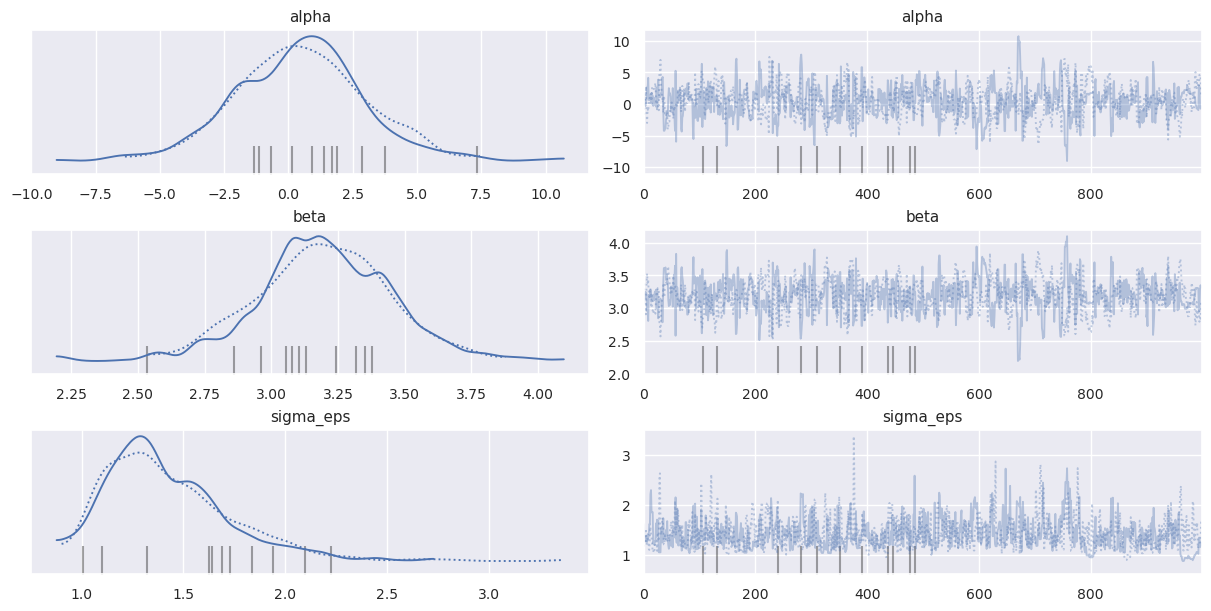

In [7]:
az.plot_trace(trace_g, var_names=['alpha', 'beta', 'sigma_eps']);

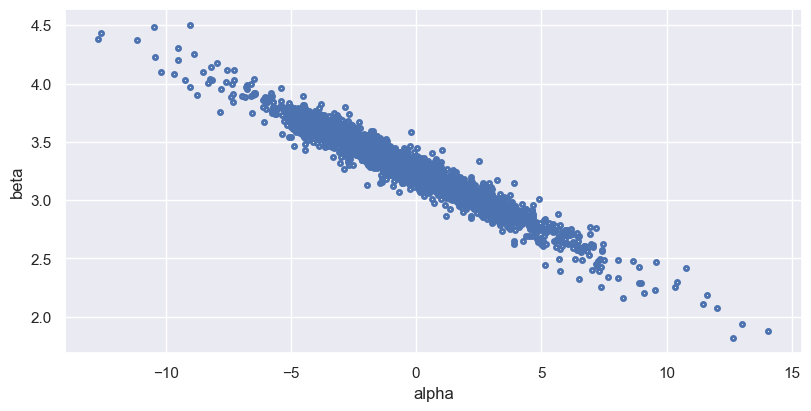

In [11]:
az.plot_pair(trace_g, var_names=['alpha', 'beta',]);

# Correlation between  parameters in the posterior
* The correlation between the samples of $\alpha$ and $\beta$ can be explained as follows.

* By providing on $\alpha$ and $\beta$, we consider a range of  values for both parameters, not only a point estimate. 

* However, given the intercept, the  most likely value of the slope is such that the fitted line  pass through the bulk of the data, practically through  ($\bar{x}, \bar{y}$).

# Correlation between  parameters in the posterior


* An increase in the slope means a decrease of the intercept and vice versa. This causes the correlation between parameters.  

* The shape of the posterior (excluding  $\sigma$) is almost a diagonal space. 

* We are in practice spinning a  line, by pivoting it around the point ($\bar{x}, \bar{y}$) which represents the center of the data.

* This can be problematic for  the sampling algorithm: samples  samples  become highly autocorrelated and  sampling becomes slow. 

# Centering $X$
* We can  remove the correlation between $\alpha$ and $\beta$ in the posterior by centering $x$:
$$x_i' = x_i' - \bar{x}$$ 


* The mean of  $x'$ is 0.


* After this transformation the central point of the data ($\bar{x'}, \bar{y}$) is (0, $\bar{y}$).

* This is the pivot point arond which the different plausible lines sping; after centering  it corresponds to the intercept. 

* Hence the slope can vary independently from the intercept.

*  This also helps in interpreting the intercept. The intercept is the value of   when  $x$=0; this is  meaningless if $x$ is  quantity such as the height or weight.

* When centering the variables, the intercept is  the value of $y$ corresponding to the mean value of $x$. 

# Standardizing $X$ and $Y$
Standardizing is  common  in statistics and ML since many algorithms are numerically  stable when the data is standardized.  This transformation is achieved by centering the data and dividing it by the standard deviation:

We transform  each data point as:
\begin{align}
x_i' & = \frac{x_i-\bar{x}}{\sigma_x}\\
y_i' & = \frac{y_i-\bar{y}}{\sigma_y}
\end{align}


# Priors for standardized  data

* With standardized  data  we can easily define vague priors, if we have no prior information to exploit.

## Prior on $\beta$

* In simple linear regression the estimated slope  $\hat{\beta}$ is  $ R s_y/s_x$.
* With standardized data. $s_y$ = $s_x$=1. 
* $R$ varies in [-1,1] by definition.
* We thus can set  $\beta \sim N(0, 0.5)$ prior.

## Prior on $alpha$

* Since $\bar{x}=0, \bar{y}=0$, we except the intercept to be 0. We allow some uncertainty on this by setting  $\alpha \sim N(0, 0.5)$

## Prior on $\sigma_{\epsilon}$

* We know that the standard deviation of  $Y$ is  1; hence we can choose a HalfNormal distribution whose median value is around 1. (again, we are  overstating a priori the variance). 



# Standardizing the data
*  Standardizing the data allow us to talk in terms of Z-scores, that is, in units of standard deviations.

* A value of -1.3 in Z-score units means that the value in question is 1.3 standard deviations below the mean, irrespective of the scale of the data.
* A change in one Z-score unit is a change in one standard deviation, whatever the scale of the original data is. 
* This is useful dealing with several variables; having all of the variables in the same scale can simplify the interpretation of the data.

In [14]:
x_std = (x - x.mean()) /  x.std()
y_std = (y_obs - y.mean()) /  y.std()

In [19]:
with pm.Model() as model_std:
    #priors on coefficients, no longer dependent on the scale of the data
    #We known that alpha will be around 0, while beta will be generally in [-1,1]. 
    #The priors below provide a large support, spanning practically the range [-3,3].
    alpha = pm.Normal ('alpha', mu=0, sd=1)
    beta   = pm.Normal ('beta',   mu=0,  sd=1)
    
    #prior on the standard deviation of the noise. The Half-Normal with sd=1 let  practically  sigma_eps vary between 0 and  3.
    #This is wide range, considering that the standardized y has standard deviation 1.
    sigma_eps = pm.HalfNormal ('sigma_eps', sd=1)
    mu              = pm.Deterministic('mu', alpha + beta * x_std)
    y_pred       = pm.Normal('y_pred', mu=mu, sd=sigma_eps, observed=y_std)

    trace_std = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_eps, beta, alpha]


/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


# No more correlation in the posterior...

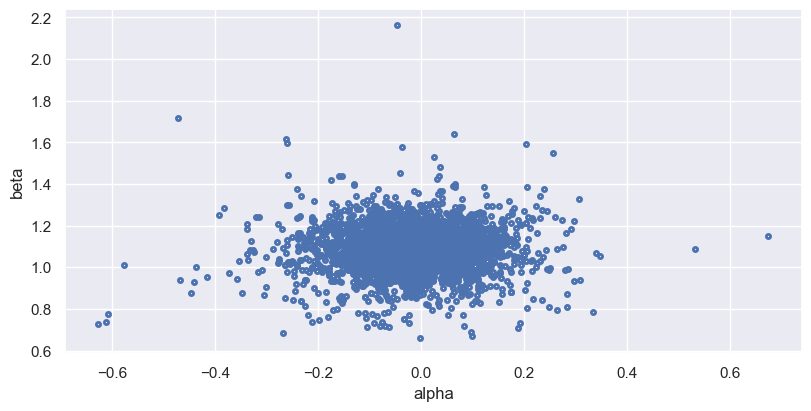

In [20]:
az.plot_pair(trace_std, var_names=['alpha', 'beta',], figsize=[8,4]);

# Interpreting the learned model

In [32]:
# Posterior uncertainty:  the 95% posterior credible interval in the parameters
az.summary(trace_std, hdi_prob=0.95, var_names=['alpha', 'beta'])

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.021,0.097,-0.220,0.164,0.002,0.002,2570.0,1825.0,1.0
beta,1.088,0.101,0.893,1.295,0.002,0.002,2622.0,1740.0,1.0


In [40]:
# Extracting the posterior mean of the parameters

# to work with samples, let us apply the extract_dataset function
idata = az.extract_dataset(trace_std)

#idata.alpha.values access the samples of alpha; likewise for idata.beta.values
alpha_hat =  idata.alpha.values.mean() # -0.02

beta_hat   =  idata.beta.values.mean() # 1.06


# The posterior mean relation is thus:  y_std  = 0.017 + 1.056 x_std

# Posterior uncertainty

* To combine the uncertainty in $\alpha$ with that in  $\beta$ for an overall picture of our uncertainty, notice that the trace provide a number $S$ of parameters samples (typically $S$=4000).


* Let us denote the $s$-th sample as   $< \alpha_s, \beta_s, \sigma_{\epsilon_s}>$.


* Each parameter set constitues an alternative plausible model of the linear  relationship.

# Visualizing the learned linear relationship: posterior mean and uncertainty

* We now plot the average line that fits the data, which is obtained by using the posterior mean of $\alpha$ and $\beta$.

* The posterior means are:

\begin{align}
\hat{\alpha} & =  \frac{1}{S} \sum_s \alpha_s \\
\hat{\beta} & = \frac{1}{S} \sum_s \beta_s \\
\end{align}


* However we will also show the uncertainty about the fitted line. We do so by plotting plausible lines obtained by using each single value of $\alpha_s, \beta_s$.   


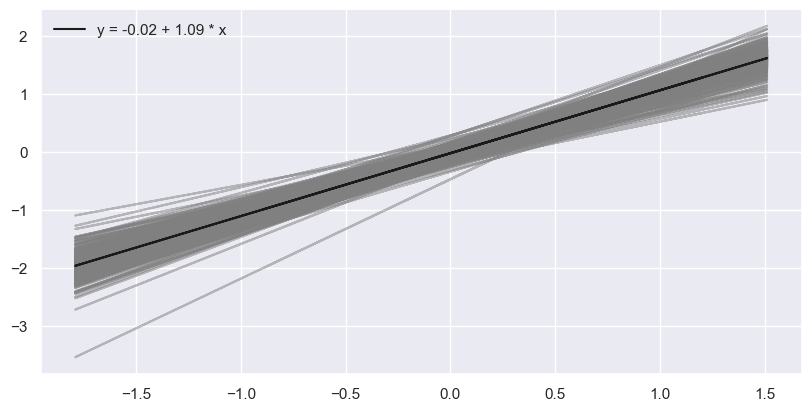

In [36]:


#to quickly compute the plot, we pick one sample every 10 
chosen_samples = range(0, len(idata.alpha.values),10)


#we show a different line for each couple of (alpha, beta) in the posterior samples.
#This shows our uncertainty in the estimate of the line.
plt.plot(x_std,  idata.alpha.values[chosen_samples] + idata.beta.values[chosen_samples] * x_std[:, np.newaxis], c='gray', alpha=0.5)

#Here we use how the mean linear relation using the posterior mean of the parameters
alpha_hat =  idata.alpha.values.mean()
beta_hat   =  idata.beta.values.mean()

#Mean value of the regression line
plt.plot(x_std, alpha_hat + beta_hat * x_std, c='k',label='y = {:.2f} + {:.2f} * x'.format(alpha_hat, beta_hat))
plt.legend();

#  Evaluating the positive association between $x$ and $y$

* We have large evidence of positive association between $x$ and $y$, i.e., that $\beta$>0:
    * in our visual examination of the posterior plausible scenarios, all exhibited positive associations.
    * more formally, the 95% HDI of $\beta$  is (0.9 - 1.2) and it only contains positive values.

# Posterior prediction

# Posterior point prediction 

Which is  the  prediction of  $y$  for the new value  (already   standardized) $x_{new}=0.5$ ?  

* The simplest answer is to use the posterior mean of the parameters ($\alpha_m, \beta_m$):
$$ \hat{y}_{new} = -0.02 + 1.06 \cdot x_{new} = -0.02 + 1.06 \cdot 0.5 = 0.51 $$

Yet this ignores two sources of variability:
   * the effect the noise, which cause the observations to deviate from the model line;
   * the posterior variability in parameters ($\alpha, \beta, \sigma_{\epsilon}$)

# Posterior predictive distribution
* We cannot compute the integrals of the predictive distributions, but we can use the posterior samples $<\alpha_{s}, \beta_{s} , \sigma_s >$, where $s$ is the index of the sample (typically we have some thousands of posterior samples).


* We can then approximate the posterior predictive model at $x_{\text{new}}=0.5$  by  evaluating each parameter set:
$$
y_{\text{new}}^{(s)} | \alpha_s, \beta_s, \sigma_s  \; \sim \; N\left(\mu^{(s)}, \left(\sigma^{(s)}\right)^2\right) \;\; \text{ with } \;\; \mu^{(s)} = \alpha^{(s)} + \beta^{(s)} \cdot 0.5.
$$


# Posterior predictive distribution
Each parameter set produces a unique prediction according to:
$$y_{new} = \alpha_s + \beta_s \cdot x_{new} + N(0, \sigma)$$

$$
\left[
\begin{array}{lll} 
\alpha^{(1)} & \beta^{(1)} & \sigma^{(1)} \\
\alpha^{(2)} & \beta^{(2)} & \sigma^{(2)} \\
\vdots & \vdots & \vdots \\
\alpha^{(4000)} & \beta^{(4000)} & \sigma^{(4000)} \\
\end{array}
\right]
\;\; \longrightarrow \;\;
\left[
\begin{array}{l} 
y_{\text{new}}^{(1)} \\
y_{\text{new}}^{(2)} \\
\vdots \\
y_{\text{new}}^{(4000)} \\
\end{array}
\right]
$$

* The resulting collection of 4,000 predictions  approximates the posterior predictive distribution in correspodence of $x_{\text{new}}$. 

# Posterior predictive distribution

* The computation based on samples is an approximation of the exact posterior predictive distribution
* It models the chance of observing any possible value of $y$  by weighting the chance of this outcome under any set of possible parameters.
* By denoting as $D$ the data observed on the training set, we have:

\begin{align}
f\left(y | x_{new},  D \right) & = \int\int\int f\left(y | x_{new},\alpha,\beta,\sigma\right) 
\underbrace {f(\alpha,\beta,\sigma|D ) }_{\text{posterior of the parameters}}
\; d\alpha \; d\beta \; d\sigma \\
& = \int\int\int N\left(y | x_{new},\alpha,\beta,\sigma\right) 
\underbrace {f(\alpha,\beta,\sigma|\mathbf{y}) }_{\text{posterior of the parameters}}
\; d\alpha \; d\beta \; d\sigma \\
\end{align}

 * We are using each combination of ($\alpha$, $\beta$, $sigma_{\epsilon}$) to compute a prediction; the resulting prediction is  weighted by the posterior density of that combination of parameters.  



 * Given the value $x_i$,  we compute the prediction corresponding to sample $s$ of the posterior as::

    $$ \hat{y}_s = \alpha_{s} + \beta_{s} x_i + \epsilon_s$$
    
* Thus intervals accounts for

    * the uncertainty in the estimates of the parameters (including noise in the estimate of $\sigma_{\epsilon}$
    * the noise which corrupts the data 
   
   See the following example recalling that: 
       * the 2.5 and 9.75 percentiles yield the 95% prediction interval
       * the 5 and the 95 percentile yield the 90% prediction interval

 

In [43]:
#Practical implementation of the posterior predictive

# Recall that the 95% prediction interval is obtained by considering the 2.5 and 9.75 percentiles.


x_test = 1.5

# index of the samples
sample_idx = range(0, len(idata.alpha.values))

#draw the noise, using the posterior samples of sigma-eps.
# An even better estimate of uncertainty would be obtained by drawing multiple  noise realizations for each value of sigma_eps.
sigma_samples = idata.sigma_eps.values[draws]  
noise_samples  = np.random.normal(loc=0, scale=sigma_samples)

#as many prediction as there are posterior samples
preds = idata.alpha.values[draws] + idata.beta.values[draws] * x_test +  noise_samples

#describe the posterior predictive distribution for the provided x_test
pd.DataFrame(preds).describe (percentiles=[.025, .05, .5, .95, .975])

,0
count,400.000000
mean,1.612291
std,0.333666
min,-0.093596
2.5%,0.955553
5%,1.099427
50%,1.614698
95%,2.109603
97.5%,2.290688
max,2.782895


In [45]:
# this computes the posterior predictive check for each x of the training set, using a chosen number of samples.
# to keep the computation fast, I set 1000 samples. 
# So far, I did not find an equivalent function to be applied on test data (x_new)
ppc_std= pm.sample_posterior_predictive(trace_std, model=model_std, samples=1000)

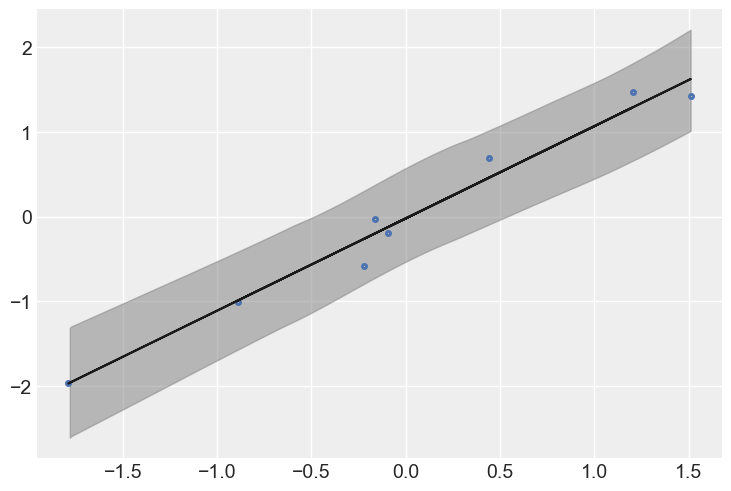

In [51]:
# here we plot the posterior predictive on the training data and we compare it with the actual observations

#plot the data
plt.plot(x_std, y_std, 'b.')

#plot the mean regression line
plt.plot(x_std, alpha_hat + beta_hat * x_std, c='k',
            label=f'y = {alpha_hat:.2f} + {beta_hat:.2f} * x')

#plot the hdi for each x
az.plot_hdi(x_std, ppc_std['y_pred'],  color='gray');

## Robust linear regression


* Gaussianity is often a reasonable approximation. 


* But sometimes the  Gaussian assumption fails, for example, in the presence of outliers. 


* As already discussed, this is because it is thin-tailed.


* The Student's t-distribution effectively deals with outliers and provides  a more robust inference. 


* This  idea can be applied also to linear regression.


# Case study


* The data set below contains an outlier.


* It is a data set from the Anscombe quartet: four data sets whose summary statistics are identical, but vary considerably when graphed.

<img src='img/anscombe3.png' width=400 align="center" >

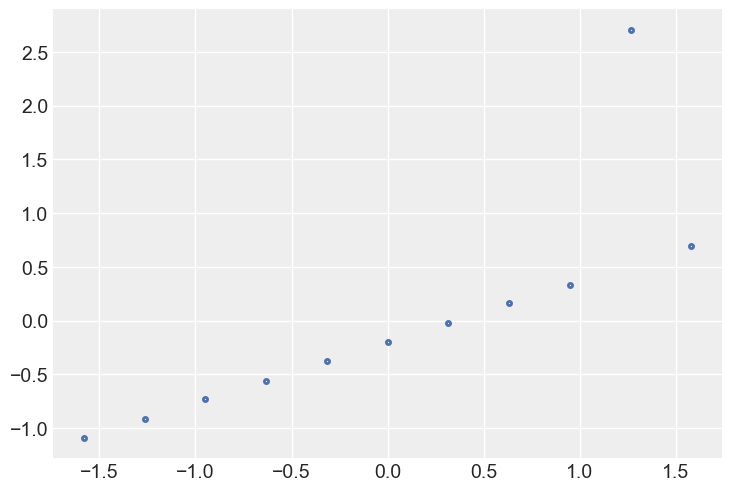

In [54]:
data = pd.read_csv('data/anscombe.csv')
x_3  = np.array(data[data.group == 'III']['x'].values)
y_3  = np.array(data[data.group == 'III']['y'].values)

#we  standardize the data
x_3_std = (x_3  - x_3.mean()) / x_3.std()
y_3_std = (y_3  - y_3.mean()) / y_3.std()

#and we plot them
plt.plot(x_3_std, y_3_std, 'b.');


# Robust linear regression in PyMC3

In [55]:
with pm.Model() as robust_model:
    #priors on intercept, slope and standard deviation of noise for standardized data
    alpha            = pm.Normal ('alpha', mu=0, sd=1)
    beta               = pm.Normal ('beta',   mu=0,  sd=1)
    sigma_eps   = pm.HalfNormal ('sigma_eps', sd=1)
    
    y_pred       = pm.StudentT ('y_pred', mu= alpha + beta * x_3_std,  sd=sigma_eps, nu=4, observed=y_3_std)    
    trace_t       = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_eps, beta, alpha]


/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
The acceptance probability does not match the target. It is 0.8890012216984596, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [56]:
with pm.Model() as gaussian_model:
    #priors on intercept, slope and standard deviation of noise for standardized data
    alpha            = pm.Normal ('alpha', mu=0, sd=1)
    beta              = pm.Normal ('beta',   mu=0,  sd=1)
    sigma_eps   = pm.HalfNormal ('sigma_eps', sd=1)
    
    y_pred               = pm.Normal ('y_pred', mu= alpha + beta * x_3_std,  sd=sigma_eps, observed=y_3_std)    
    trace_normal   = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_eps, beta, alpha]


/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


In [67]:
pd.concat( [az.summary(trace_normal), az.summary(trace_t)])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.001,0.214,-0.410,0.397,0.004,0.004,3508.0,2433.0,1.0
beta,0.785,0.214,0.375,1.169,0.004,0.003,3105.0,2125.0,1.0
sigma_eps,0.703,0.179,0.420,1.016,0.003,0.003,2664.0,2311.0,1.0
alpha,-0.199,0.001,-0.202,-0.197,0.000,0.000,2171.0,1284.0,1.0
beta,0.564,0.001,0.562,0.567,0.000,0.000,1924.0,1262.0,1.0
sigma_eps,0.004,0.002,0.001,0.007,0.000,0.000,922.0,1108.0,1.0


# Comment on the estimate
* As shown in previous slide, the uncertainty in the estimate  of   $\alpha$, $\beta$   and $\sigma_{\epsilon}$ is very narrow but only if we use the robust model.


* Indeed, we are fitting a line to a perfectly aligned set of points, apart from the outlier.


* However the gaussian model implies large uncertainty on the estimates.


* Also, the estimates of the parameters are rather different between the two models.

# Robust vs non-robust fit
* We now compare the mean fit of the robust model and the Gaussian model.

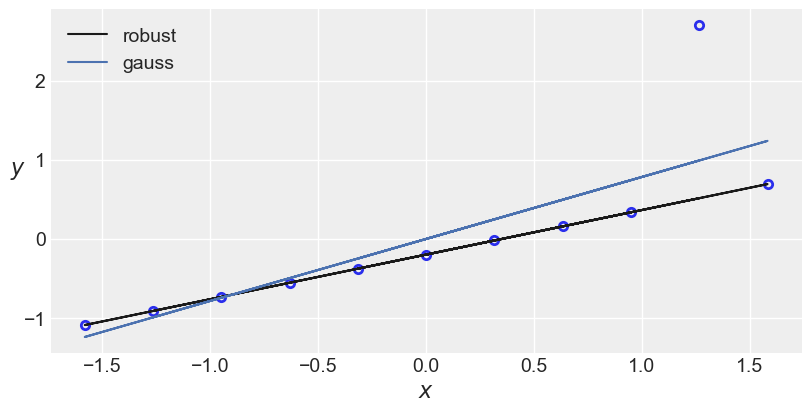

In [69]:

# plotting least-square regression
plt.figure(figsize=(8, 4))
plt.plot(x_3_std, y_3_std, 'C0o')

#posterior mean of the parameters, robust model
post_t         = az.extract_dataset(trace_t)
alpha_t       = post_t.alpha.values.mean()
beta_t         = post_t.beta.values.mean()



#posterior mean of the parameters, robust model
post_gauss        = az.extract_dataset(trace_normal)
alpha_gauss      = post_gauss.alpha.values.mean()
beta_gauss        = post_gauss.beta.values.mean()




# plotting robust regression, using for simplicity the posterior mean of the parameters
plt.plot(x_3_std, alpha_t + beta_t * x_3_std, c='k', label='robust')
plt.plot(x_3_std, alpha_gauss + beta_gauss * x_3_std, c='b', label='gauss')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.legend();

# Discussion

* The least-squares fit tries to compromise and include all points.


* The robust model automatically discards the outlier and fits a line that passes exactly through all the remaining points. 


* This is  a  peculiar dataset, but the message remains for more real and complex ones. 


* A Student's t-distribution, due to its heavier tails, is able to give less importance to points that are far away from the bulk of the data, filtering outliers in an automatic way.

* We will see how we can choose among different competing models fitted on the same data in a rigorous way by adopting the WAIC criterion.

# Exercise 1

* In the following model, what is the linear model? What is the likelihood and how many parameters are there in the posterior distribution?

$$
\alpha \sim Normal(0, 10) \\
\beta \sim Normal(0, 1) \\
\epsilon \sim HalfNormal(25) \\
\mu = \alpha + \beta x \\
y \sim Normal(\mu, \epsilon) \\
$$

# Exercise

* In the following model, what is the linear model? What is the likelihood and how many parameters are there in the posterior distribution?

$$
\alpha \sim Normal(0, 10) \\
\beta \sim Normal(0, 1) \\
\epsilon \sim HalfNormal(25) \\
\mu = \alpha + \beta x \\
y \sim Normal(\mu, \epsilon) \\
$$


5. Para el modelo del punto 1, asumiendo que tiene 57 datos provenientes de una gaussiana con media 4 y desviación estándar 0.5, obtenga usando PyMC3:
    * La distribución a posteriori
    * La distribución a priori
    * La distribución predictiva a posteriori 
    * La distribución predictiva a priori

tip: además de `sample` PyMC3 tiene varias funciones para muestrear 

6. Ejecuta el modelo `model_g`:
    * Usando NUTS (sampler por defecto)
    * Usando Metropolis

Compare los resultados usando funciones de ArviZ como `plot_trace` y `plot_pairs`. Centre la variable $x$ y repita el ejercicio ¿Qué opina?


7. Usando el conjunto de datos `howell` (disponible junto con esta notebook) realice un modelo lineal del peso ($x$) versus la altura ($y$). Excluya a los menores de 18 años. Exponga los resultados.

8. Para 4 individuos se registraron los pesos (45.73, 65.8, 54.2, 32.59), pero no las alturas. Usando el modelo del punto anterior prediga la altura esperada para cada individuo junto con un intervalo de credibilidad del 50% y del 89%.

9. Repita el punto 7 pero para los menores de 18 años. Exponga los resultados.

10. Es conocido que para muchas especies el peso no escala con la altura, pero si el logaritmo del pesos. Use esa información para ajustar el conjunto de datos `howell` (sin distinción por edad). Repita el ajuste usando un polinomio de grado 2. Explique y compare ambos resultados.

11. Piense en un modelo que sea capaz de ajustar los 3 primeros conjuntos del cuarteo de Anscombe, y en uno que sea capaz de ajustar los 4.

12. Para el modelo `hierarchical_model` repita la figura donde se representan los 8 grupos y las 8 lineas ajustadas, pero esta vez incluyendo la incertidumbre del ajuste.

13. Escriba en PyMC3 un modelo lineal para predecir la cantidad de papers que un estudiante de doctorado producirá en función de el tamaño del grupo donde trabaja el estudiante, la cantidad de fondos que recibe el grupo, el género del estudiante ¿Cómo cambia el modelo si se asume género binario o género categórico (más de dos opciones)?

14. Supongamos que el siguiente enunciado es cierto "las ciudades en Argentina con más policías tienen más delitos" ¿Quiere decir esto que la policía Argentina es corrupta?

15. Lea este [post](https://twiecki.github.io/blog/2017/02/08/bayesian-hierchical-non-centered/) y replique los resultados usted mismo.